In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df['Gender'] = df['Gender'].replace({'Female':0,'Male':1})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [5]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [41]:
X = df.iloc[:,2:-1]
Y = df.iloc[:,-1]
# df.iloc[:,3:4]

,EstimatedSalary
0,19000
1,20000
2,43000
3,57000
4,76000
...,...
395,41000
396,23000
397,20000
398,33000


In [28]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(X,Y,test_size = .2,random_state = 42)

# model building

In [29]:
from sklearn.svm import SVC #importing support vector classifier

In [30]:
svm_clf = SVC(kernel = 'rbf',C=1.0)
svm_clf.fit(x_train,y_train)

SVC()

# prediction

In [31]:
y_pred = svm_clf.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
score = accuracy_score(y_test, y_pred)
print(score)

0.7375


In [34]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[49  3]
 [18 10]]


In [35]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.77      0.36      0.49        28

    accuracy                           0.74        80
   macro avg       0.75      0.65      0.66        80
weighted avg       0.74      0.74      0.71        80



# Result

In [36]:
from sklearn.inspection import DecisionBoundaryDisplay
# IF ERROR OCCURS -> pip install -U scikit-learn --user

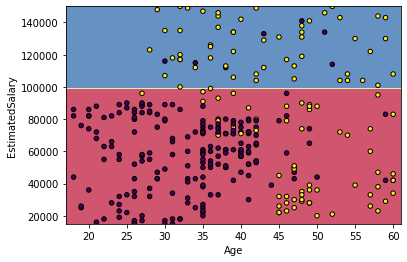

In [37]:
DecisionBoundaryDisplay.from_estimator(
    svm_clf,
    x_train,
    response_method = 'predict',
    cmap = plt.cm.Spectral,
    alpha = 0.8,
    xlabel = 'Age',
    ylabel = 'EstimatedSalary',
)

plt.scatter(x_train['Age'],x_train['EstimatedSalary'],
           c= y_train,
           s = 20,
            edgecolors = 'k'
           )

plt.show()


